In [ ]:
import numpy as np                     # Math
import matplotlib.pyplot as plt        # Plot
import sklearn                         # Sklearn
from sklearn import preprocessing      # Preprocessing
from sklearn.svm import SVC
import sklearn.model_selection as cv   # Cross-validation
from sklearn.model_selection import train_test_split, GridSearchCV # split
import sklearn.neighbors as nb         # KNN
import pandas as pd                    # Pandas
from sklearn.model_selection import cross_val_score  
%matplotlib inline

# Read dataset and split

In [ ]:
df = pd.read_csv("preprocessed_mean.csv");
df = pd.get_dummies(df, columns=["mode","key"])

targetCol = 'music_genre';
Y = df[targetCol]
X = df.drop([targetCol],axis=1)

# Explicar why 50%
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.5, shuffle=True, stratify=Y, random_state=33)

In [ ]:
df.shape

(20000, 26)

# Standarize data

In [ ]:
scaler = preprocessing.StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Kernel lineal

In [ ]:
knc = SVC(kernel='linear')
knc.fit(X_train,Y_train);
pred = knc.predict(X_test);
print(sklearn.metrics.confusion_matrix(Y_test,pred));
print(sklearn.metrics.accuracy_score(Y_test,pred));
cvacc = cross_val_score(SVC(kernel='linear'), X=X_train,  y=Y_train, cv=10, scoring='accuracy')
print('Acc. 10-fold cross on train data= ', cvacc.mean())
print('Std. 10-fold cross on train data= ', cvacc.std())

[[2278  177    2   43]
 [ 101 2123  131  145]
 [   2   80 2150  268]
 [  13   59  187 2241]]
0.8792
Acc. 10-fold cross on train data=  0.8776999999999999
Std. 10-fold cross on train data=  0.012530363123229919


## Search best C

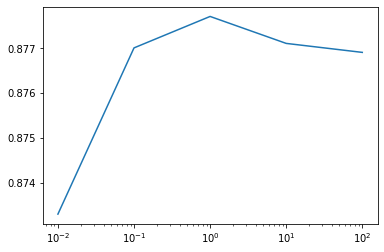

Acc. 10-fold cross on train data=  0.8776999999999999

Confusion matrix on test set:
 [[2278  177    2   43]
 [ 101 2123  131  145]
 [   2   80 2150  268]
 [  13   59  187 2241]]

Accuracy on test set:  0.8792

Best value of parameter C found:  {'C': 1.0}

Number of supports:  2954 ( 3864 of them have slacks)
Prop. of supports:  0.2954


In [ ]:
# List of C values to test. We usualy test diverse orders of magnitude
Cs = np.logspace(-2, 2, num=5, base=10.0)

param_grid = {'C': Cs}
grid_search = GridSearchCV(SVC(kernel='linear'), param_grid, cv=10, n_jobs=-1)
grid_search.fit(X_train,Y_train)

# Let's plot the 10-fold cross.validation accuracy deppending on C
scores = grid_search.cv_results_['mean_test_score']
plt.semilogx(Cs,scores)
plt.show()

parval=grid_search.best_params_
cvacc = cross_val_score(SVC(C=parval['C'],kernel='linear'), X=X_train,  y=Y_train, cv=10, scoring='accuracy')
print('Acc. 10-fold cross on train data= ', cvacc.mean())

knc = SVC(C=parval['C'],kernel='linear')
knc.fit(X_train, Y_train)
pred=knc.predict(X_test)

print("\nConfusion matrix on test set:\n",sklearn.metrics.confusion_matrix(Y_test, pred))
print("\nAccuracy on test set: ",sklearn.metrics.accuracy_score(Y_test, pred))
print("\nBest value of parameter C found: ",parval)
print("\nNumber of supports: ",np.sum(knc.n_support_), "(",np.sum(np.abs(knc.dual_coef_)==parval['C']) ,"of them have slacks)")
print("Prop. of supports: ",np.sum(knc.n_support_)/X_train.shape[0])

In [ ]:
Y_test_pred = knc.predict(X_test);
print(sklearn.metrics.classification_report(Y_test,Y_test_pred))

              precision    recall  f1-score   support

   Classical       0.95      0.91      0.93      2500
  Electronic       0.87      0.85      0.86      2500
     Hip-Hop       0.87      0.86      0.87      2500
        Rock       0.83      0.90      0.86      2500

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000



# Kernel RBF

In [ ]:
knc = SVC()
knc.fit(X_train,Y_train);
pred = knc.predict(X_test);
print(sklearn.metrics.confusion_matrix(Y_test,pred));
print(sklearn.metrics.accuracy_score(Y_test,pred));
cvacc = cross_val_score(SVC(), X=X_train,  y=Y_train, cv=10, scoring='accuracy')
print('Acc. 10-fold cross on train data = ', cvacc.mean())
print('Std. 10-fold cross on train data = ', cvacc.std())

[[2293  173    2   32]
 [  68 2130  137  165]
 [   0   68 2164  268]
 [  15   62  171 2252]]
0.8839
Acc. 10-fold cross on train data =  0.8836999999999999
Std. 10-fold cross on train data =  0.010536128321162389


In [ ]:
gammas = np.logspace(-9, 1, num=11, base=10.0)
Cs = np.logspace(-1, 6, num=8, base=10.0)

param_grid = {'C': Cs, 'gamma' : gammas}
grid_search = GridSearchCV(SVC(), param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train,Y_train)
parval=grid_search.best_params_

# We'll show in a grid, the accuracy for each combination of parameters tester
scores = grid_search.cv_results_['mean_test_score']
scores = np.array(scores).reshape(len(param_grid['C']), len(param_grid['gamma']))

plt.matshow(scores)
plt.xlabel('gamma')
plt.ylabel('C')
plt.colorbar()
plt.xticks(np.arange(len(param_grid['gamma'])), param_grid['gamma'],rotation='vertical')
plt.yticks(np.arange(len(param_grid['C'])), param_grid['C'])
plt.show()
parval=grid_search.best_params_
print("\nBest combination of parameters found: ",parval)

cvacc = cross_val_score(SVC(C=parval['C'], gamma=parval['gamma']) , X=X_train,  y=Y_train, cv=5, scoring='accuracy')
print('\nAcc. 10-fold cross on train data= ', cvacc.mean())

In [ ]:
cvacc = cross_val_score(SVC(C=10, gamma=0.01) , X=X_train,  y=Y_train, cv=10, scoring='accuracy')
print('\nAcc. 10-fold cross on train data= ', cvacc.mean())
print('\nAcc. 10-fold cross on train data= ', cvacc.std())


Acc. 10-fold cross on train data=  0.8859

Acc. 10-fold cross on train data=  0.011175419455215102


In [ ]:
knc = SVC(C=10,kernel='rbf',gamma=0.01)
knc.fit(X_train, Y_train)
pred=knc.predict(X_test)

print("\nConfusion matrix on test set:\n",sklearn.metrics.confusion_matrix(Y_test, pred))
print("\nAccuracy on test set: ",sklearn.metrics.accuracy_score(Y_test, pred))


Confusion matrix on test set:
 [[2302  161    3   34]
 [  73 2143  135  149]
 [   1   73 2174  252]
 [  14   70  173 2243]]

Accuracy on test set:  0.8862


In [ ]:
Y_test_pred = knc.predict(X_test);
print(sklearn.metrics.classification_report(Y_test,Y_test_pred))

              precision    recall  f1-score   support

   Classical       0.96      0.92      0.94      2500
  Electronic       0.88      0.86      0.87      2500
     Hip-Hop       0.87      0.87      0.87      2500
        Rock       0.84      0.90      0.87      2500

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



In [ ]:
print("\nNumber of supports: ",np.sum(knc.n_support_), "(",np.sum(np.abs(knc.dual_coef_)==10) ,"of them have slacks)")
print("Prop. of supports: ",np.sum(knc.n_support_)/X_train.shape[0])


Number of supports:  3040 ( 3534 of them have slacks)
Prop. of supports:  0.304
